In [1]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff

raw_data = loadarff('data/dataset_191_wine.arff')
df = pd.DataFrame(raw_data[0])

In [2]:
df

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,b'3',13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,b'3',13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,b'3',13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,b'3',13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    object 
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    float64
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

# Сведение к задаче регрессии

In [5]:
df["class"] = df["class"].apply(int)
df["class"].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:>

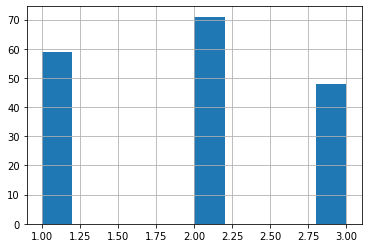

In [6]:
df["class"].hist()

In [7]:
for x in list(df["class"].unique()):
    df["target_" + str(x)] = (df["class"] == x).apply(float)
    
target_columns = ["target_" + str(x) for x in list(df["class"].unique())]
print(target_columns)

df = df.drop(columns=["class"])

df

['target_1', 'target_2', 'target_3']


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,target_1,target_2,target_3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0,0.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0,0.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0,0.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,0.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0.0,0.0,1.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0.0,0.0,1.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0.0,0.0,1.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0.0,0.0,1.0


In [8]:
df_x = df.drop(columns=target_columns)
df_x

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
df_y = df[target_columns]
df_y

,target_1,target_2,target_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
173,0.0,0.0,1.0
174,0.0,0.0,1.0
175,0.0,0.0,1.0
176,0.0,0.0,1.0


In [10]:
X = df_x.to_numpy()
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
Y = df_y.to_numpy()
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Нормализация признаков

In [12]:
def minimax(column):
    mn = np.min(column)
    mx = np.max(column)
    return (column - mn) / (mx - mn)

In [13]:
X = np.apply_along_axis(minimax, 1, X)

# Реализация алгоритма

In [14]:
!type cfml\regression.py

import numpy as np
import math


class Model:
    def __init__(self, X_train, Y_train):
        self._X_train = X_train
        self._Y_train = Y_train
        assert len(X_train) == len(Y_train)
        self._dist_func = None
        self._kernel_func = None
        self._h_func = None
        self._looi = None
        self._loo_cache_x = {}
        self._loo_cache_y = {}

    @property
    def dist_func(self):
        return self._dist_func

    @dist_func.setter
    def dist_func(self, value):
        assert callable(value)
        self._dist_func = value

    @property
    def kernel_func(self):
        return self._kernel_func

    @kernel_func.setter
    def kernel_func(self, value):
        assert callable(value)
        self._kernel_func = np.vectorize(value)

    @property
    def h_func(self):
        return self._h_func

    @h_func.setter
    def h_func(self, value):
        assert callable(value)
        self._h_func = value

    def _loo(self, nparr):
        return np.de

# Параметры окна

In [15]:
n = len(df)
n

178

In [16]:
def rd(ro):
    max_ = 0.0
    for x1 in X:
        for x2 in X:
            max_ = max(max_, ro(x1, x2))
    return max_

def gen(start, stop, step):
    res = []
    x = start
    while x < stop:
        res.append(x)
        x += step
    return res

In [17]:
from math import sqrt

theta_by_window_type_by_ro = {
    "fixed": (lambda ro: gen(rd(ro) / sqrt(n), rd(ro), rd(ro) / sqrt(n))),
    "variable": (lambda _: list(range(1, int(sqrt(n)) + 1)))
}

In [18]:
import cfml.regression as regression
import cfml.fscore as fscore
from tqdm import tqdm

def count_f1_loo(model):
    n = len(X)
    cm = np.zeros((n, n))
    for i in range(n):
        model.leave_one_out_index = i
        
        y_pred = model(X[i]).argmax()
        y_real = Y[i].argmax()
        
        cm[y_real][y_pred] += 1
    
    return fscore.avg_f_scores(cm)

In [19]:
distances = ["euclidean", "manhattan", "chebyshev"]
kernels = ["uniform", "triangular", "epanechnikov", "quartic"]
window_types = ["fixed", "variable"]


best_f1 = 0
best_params = ()
f1_avg_scores = {}

model = regression.nadaraya_watson(X, Y.transpose())

for ro_name in tqdm(distances):
    ro = regression.dist(ro_name)
    model.dist_func = ro
    
    for ker_name in kernels:
        kernel = regression.kernel(ker_name)
        model.kernel_func = kernel
        
        for wtype_name in window_types:            
            for param in theta_by_window_type_by_ro[wtype_name](ro):
                print(ro_name, ker_name, wtype_name, param, end="\t\t\t=> f1 avg = ")
                
                h = regression.h(wtype_name, param)
                model.h_func = h
                
                f1_avg, macro_f1_avg, micro_f1_avg = count_f1_loo(model)
                print(f1_avg)
                
                if (ro_name, ker_name, wtype_name) not in f1_avg_scores:
                    f1_avg_scores[(ro_name, ker_name, wtype_name)] = []
                f1_avg_scores[(ro_name, ker_name, wtype_name)].append((param, f1_avg, macro_f1_avg, micro_f1_avg))
                
                if f1_avg > best_f1:
                    best_f1 = f1_avg
                    best_params = (ro_name, ker_name, wtype_name, param)

print("best f1 & params:")
print(best_f1, best_params)

  0%|          | 0/3 [00:00<?, ?it/s]

euclidean uniform fixed 0.01917226432074423			=> f1 avg = 0.7222206107798883
euclidean uniform fixed 0.03834452864148846			=> f1 avg = 0.6439435710814045
euclidean uniform fixed 0.05751679296223269			=> f1 avg = 0.5936305945936764
euclidean uniform fixed 0.07668905728297692			=> f1 avg = 0.5210013658614399
euclidean uniform fixed 0.09586132160372116			=> f1 avg = 0.4923391215526046
euclidean uniform fixed 0.11503358592446539			=> f1 avg = 0.49980592573424765
euclidean uniform fixed 0.13420585024520962			=> f1 avg = 0.4846466780365415
euclidean uniform fixed 0.15337811456595385			=> f1 avg = 0.3845152786484705
euclidean uniform fixed 0.17255037888669808			=> f1 avg = 0.22747168449077204
euclidean uniform fixed 0.1917226432074423			=> f1 avg = 0.22747168449077204
euclidean uniform fixed 0.21089490752818654			=> f1 avg = 0.22747168449077204
euclidean uniform fixed 0.23006717184893077			=> f1 avg = 0.22747168449077204
euclidean uniform fixed 0.249239436169675			=> f1 avg = 0.22747168449077

 33%|███▎      | 1/3 [01:18<02:36, 78.02s/it]

0.8598741975479993
manhattan uniform fixed 0.027827082422549658			=> f1 avg = 0.8933739981434158
manhattan uniform fixed 0.055654164845099316			=> f1 avg = 0.7972980203317281
manhattan uniform fixed 0.08348124726764897			=> f1 avg = 0.6315400146689312
manhattan uniform fixed 0.11130832969019863			=> f1 avg = 0.5205834345581537
manhattan uniform fixed 0.1391354121127483			=> f1 avg = 0.5064531208135948
manhattan uniform fixed 0.16696249453529796			=> f1 avg = 0.5069177067907764
manhattan uniform fixed 0.19478957695784763			=> f1 avg = 0.5379751993945392
manhattan uniform fixed 0.2226166593803973			=> f1 avg = 0.5000113083283577
manhattan uniform fixed 0.25044374180294693			=> f1 avg = 0.3421584364082712
manhattan uniform fixed 0.2782708242254966			=> f1 avg = 0.22747168449077204
manhattan uniform fixed 0.30609790664804626			=> f1 avg = 0.22747168449077204
manhattan uniform fixed 0.3339249890705959			=> f1 avg = 0.22747168449077204
manhattan uniform fixed 0.3617520714931456			=> f1 avg =

 67%|██████▋   | 2/3 [02:26<01:12, 72.56s/it]

0.9155593902358017
chebyshev uniform fixed 0.018607750843702548			=> f1 avg = 0.6984326185704827
chebyshev uniform fixed 0.037215501687405096			=> f1 avg = 0.6206753385726098
chebyshev uniform fixed 0.05582325253110765			=> f1 avg = 0.5759583735898939
chebyshev uniform fixed 0.07443100337481019			=> f1 avg = 0.5210901913149104
chebyshev uniform fixed 0.09303875421851274			=> f1 avg = 0.4726748111350375
chebyshev uniform fixed 0.11164650506221528			=> f1 avg = 0.5006310792827646
chebyshev uniform fixed 0.13025425590591783			=> f1 avg = 0.4690787233661272
chebyshev uniform fixed 0.14886200674962038			=> f1 avg = 0.3421584364082712
chebyshev uniform fixed 0.16746975759332294			=> f1 avg = 0.22747168449077204
chebyshev uniform fixed 0.1860775084370255			=> f1 avg = 0.22747168449077204
chebyshev uniform fixed 0.20468525928072806			=> f1 avg = 0.22747168449077204
chebyshev uniform fixed 0.22329301012443062			=> f1 avg = 0.22747168449077204
chebyshev uniform fixed 0.24190076096813318			=> f1 

100%|██████████| 3/3 [03:36<00:00, 72.22s/it]

0.7663285685549256
best f1 & params:
0.9324261281420742 ('manhattan', 'triangular', 'fixed', 0.027827082422549658)


In [20]:
pltdata = np.array(f1_avg_scores[('manhattan', 'triangular', 'fixed')])
pltdata

array([[0.02782708, 0.93242613, 0.93262566, 0.92991216],
       [0.05565416, 0.87078446, 0.87082664, 0.87059041],
       [0.08348125, 0.80197509, 0.80299841, 0.80484087],
       [0.11130833, 0.74608675, 0.75426292, 0.75695936],
       [0.13913541, 0.68106912, 0.72971087, 0.71777978],
       [0.16696249, 0.59631413, 0.69641797, 0.6728997 ],
       [0.19478958, 0.53132278, 0.53133303, 0.64912904],
       [0.22261666, 0.52677472, 0.52682744, 0.64354237],
       [0.25044374, 0.53693529, 0.53732502, 0.65510819],
       [0.27827082, 0.55215074, 0.55352201, 0.67256637],
       [0.30609791, 0.54799744, 0.55006722, 0.6666372 ],
       [0.33392499, 0.55516135, 0.56041041, 0.67183645],
       [0.36175207, 0.56180373, 0.56933287, 0.67701918]])

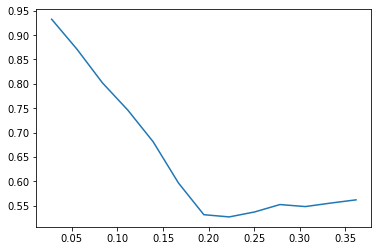

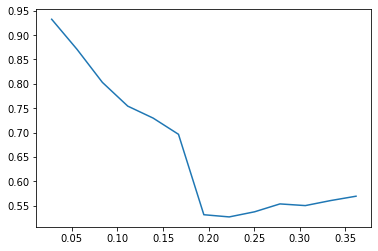

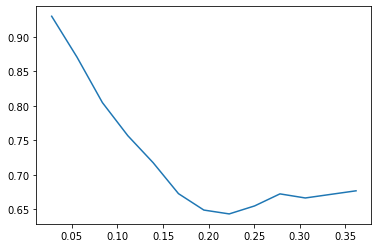

In [21]:
import matplotlib.pyplot as plt
d = pltdata.transpose()
plt.plot(d[0], (d[1]))
plt.show()
plt.plot(d[0], (d[2]))
plt.show()
plt.plot(d[0], (d[3]))
plt.show()